In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

def get_cali():
  #load the california housing dataset
  dataset=fetch_california_housing()
  df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
  df["MEDV"]=dataset.target
  df.index.name='record'
  
  # split into training and test sets
  X_train, X_test, y_train, y_test=train_test_split(df.loc[:,df.columns != "MEDV"], df["MEDV"], test_size=.33, random_state=42)

  return [X_train, X_test, y_train, y_test]

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# get california dataset
X_train, X_test, y_train, y_test=get_cali()

# instantiate regression object and fit to training data
clf=LinearRegression()
clf.fit(X_train,y_train)

# predict on test set and score the predictions against y_test
y_pred=clf.predict(X_test)
r2=r2_score(y_test, y_pred)
print('r2 score is '+str(r2))

r2 score is 0.5970494128783957


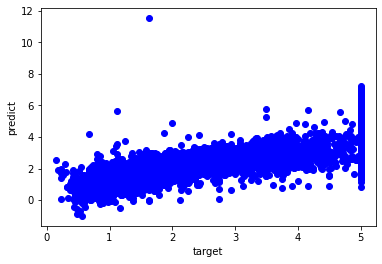

In [ ]:
# 시각화로 확인
import matplotlib.pyplot as plt
plt.plot(y_test, y_pred, "bo")
plt.xlabel("target")
plt.ylabel("predict")
plt.show()

In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# get california dataset
X_train, X_test, y_train, y_test=get_cali()

# instantiate regression object and fit to training data
clf=Lasso(alpha=0.1)
clf.fit(X_train,y_train)

# predict on test set and score the predictions against y_test
y_pred=clf.predict(X_test)
r2=r2_score(y_test, y_pred)
print('r2 score is '+str(r2))

r2 score is 0.5446175088821326


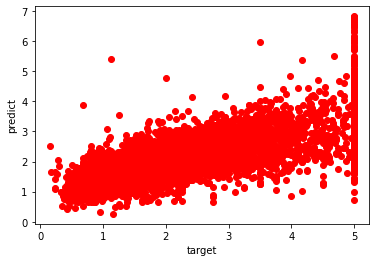

In [ ]:
# 시각화로 확인
import matplotlib.pyplot as plt
plt.plot(y_test, y_pred, "ro")
plt.xlabel("target")
plt.ylabel("predict")
plt.show()

In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# get california dataset
X_train, X_test, y_train, y_test=get_cali()

# instantiate regression object and fit to training data
clf=Ridge(alpha=0.3)
clf.fit(X_train,y_train)

# predict on test set and score the predictions against y_test
y_pred=clf.predict(X_test)
r2=r2_score(y_test, y_pred)
print('r2 score is '+str(r2))

r2 score is 0.5970629845342554


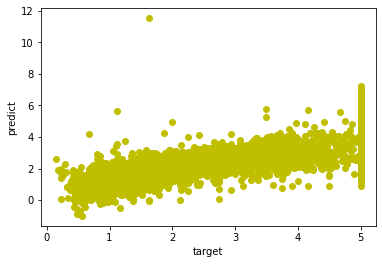

In [ ]:
# 시각화로 확인
import matplotlib.pyplot as plt
plt.plot(y_test, y_pred, "yo")
plt.xlabel("target")
plt.ylabel("predict")
plt.show()

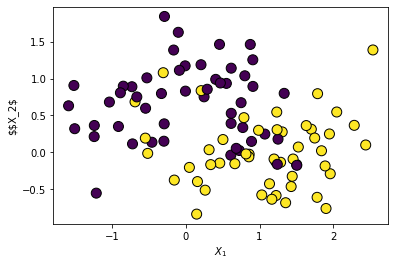

In [1]:
# import modules
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# define function get_moon_data()
def get_moon_data():
  X,y=make_moons(n_samples=150, noise=0.4, random_state=42)
  X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.33, random_state=42)
  return [X_train, X_test, y_train, y_test]

X_train, X_test, y_train, y_test=get_moon_data()
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train,s=100,edgecolor='k')
plt.xlabel('$X_1$')
plt.ylabel("$$X_2$")
plt.show()

In [2]:
# import modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

#create dataset
X_train, X_test, y_train, y_test=get_moon_data()

#initiate and fit logistic regression classifier
clt=LogisticRegression(penalty='l2',C=0.5)
clt.fit(X_train,y_train)

#predict label of test set
y_pred=clt.predict(X_test)

#compute f1_score
f1=f1_score(y_test,y_pred)

print("f1 score is ",str(f1))

f1 score is  0.7499999999999999


In [3]:
# import modules
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

# generate confusion matrix
cm=confusion_matrix(y_test,y_pred)

tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

20 5 7 18


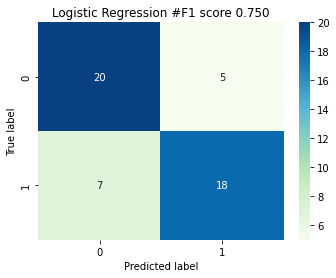

In [4]:
import matplotlib.pyplot as plt
# generate dataframe
df_cm=pd.DataFrame(cm)

#visualize confusion matrix
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, cmap="GnBu", annot=True)

# setfigure 
plt.title("Logistic Regression #F1 score {0:.3f}" .format(f1_score(y_test,y_pred)))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

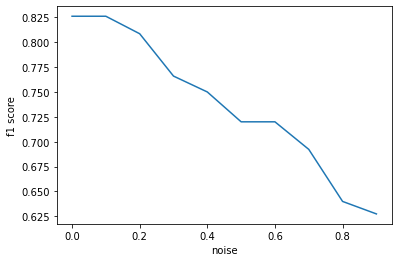

In [5]:
# import modules
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np

# define function get_moon_data()
def get_moon_data(input_noise):
  X,y=make_moons(n_samples=150, noise=input_noise, random_state=42)
  X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.33, random_state=42)
  return [X_train, X_test, y_train, y_test]


noise=[]
score=[]
for i in np.arange(0,1,0.1):
  X_train, X_test, y_train, y_test=get_moon_data(i)
  noise.append(i)

  #initiate and fit logistic regression classifier
  clt=LogisticRegression(penalty='l2',C=0.5)
  clt.fit(X_train,y_train)

  #predict label of test set
  y_pred=clt.predict(X_test)

  #compute f1_score
  score.append(f1_score(y_test,y_pred))

plt.plot(noise,score)
plt.xlabel('noise')
plt.ylabel("f1 score")
plt.show()